N:  9
initial X:
[[ 0.382467   -0.80208201 -0.45867575]
 [-0.60323374 -0.32253882 -0.72943661]
 [-0.96912461  0.09960596 -0.22555739]
 [-0.84808395  0.24075488 -0.47200709]
 [ 0.06998541  0.98229504  0.17377714]
 [ 0.65949428 -0.71472712  0.23287858]
 [-0.54787972 -0.69667797 -0.46310649]
 [-0.25803775  0.04651793 -0.9650143 ]
 [ 0.48937913  0.25297378 -0.83457315]]
Optimal point:  [[ 0.06688834  0.39754829  0.91514005]
 [ 0.94274545  0.25851612  0.2107141 ]
 [-0.57198795 -0.51798286  0.63602166]
 [-0.87999461  0.45018067  0.15148217]
 [ 0.16175892  0.96546527 -0.20423236]
 [ 0.51409376 -0.77867612  0.35968194]
 [-0.40354876 -0.80203962 -0.44031902]
 [-0.43823449  0.24241296 -0.86555559]
 [ 0.61095193 -0.21545294 -0.76178591]]
Potential in the website:
9: 25.7599865
11: 40.5964505
13: 58.8532306
Potential i got:
9 :  25.760442194430194
N:  11
initial X:
[[ 0.55468462  0.7066145   0.43934147]
 [-0.11887815 -0.70745701  0.69668685]
 [-0.30919513  0.93748928  0.15972543]
 [ 0.77695596  0.

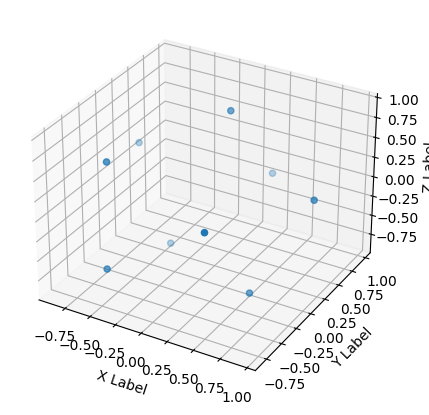

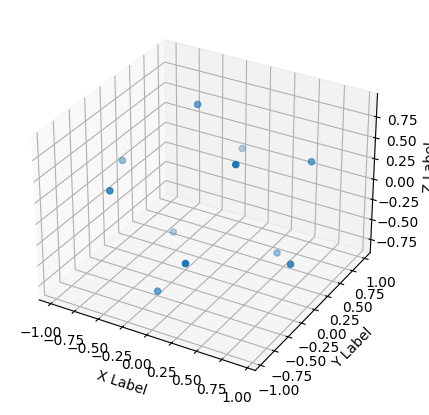

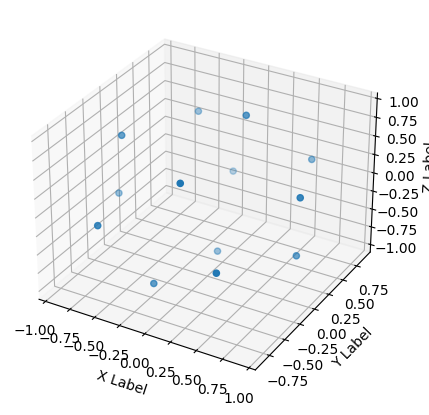

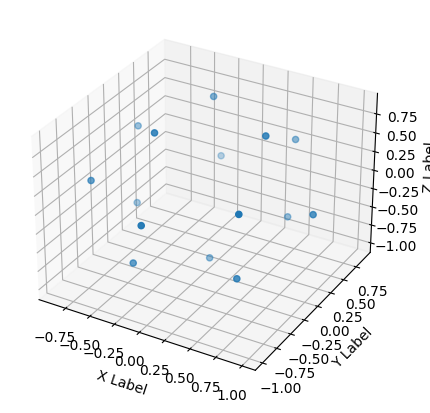

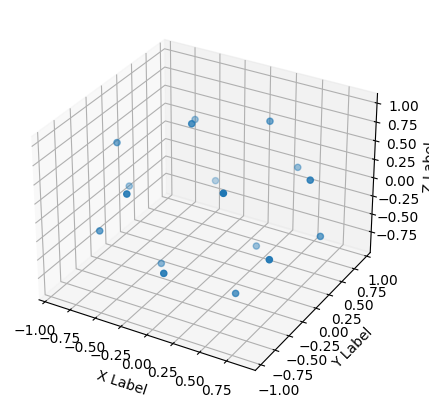

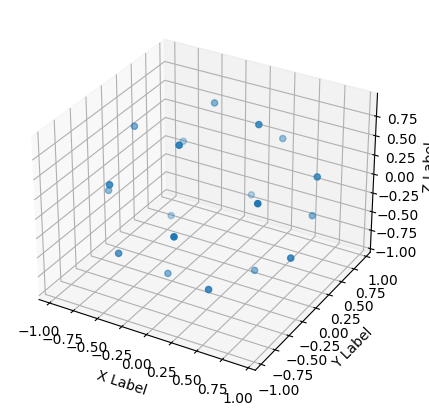

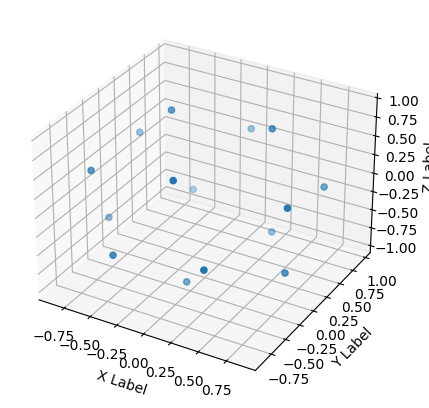

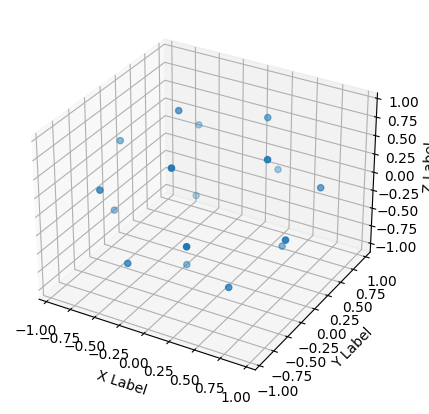

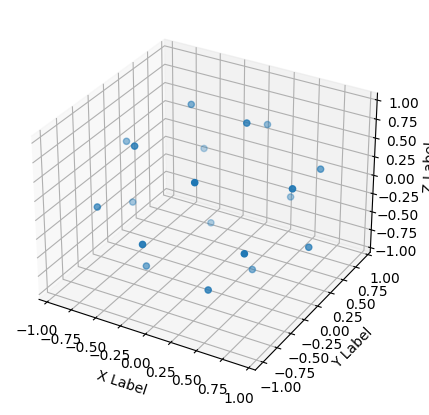

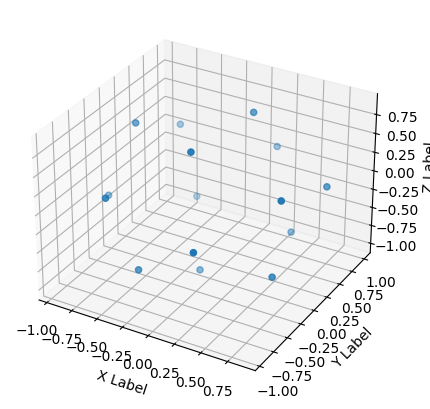

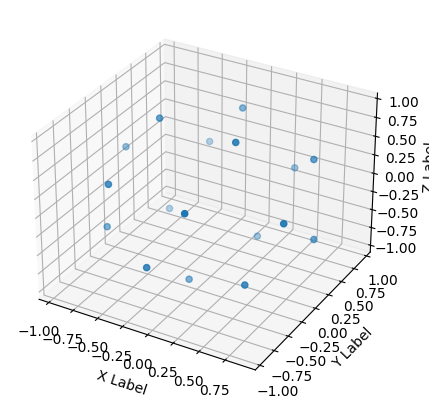

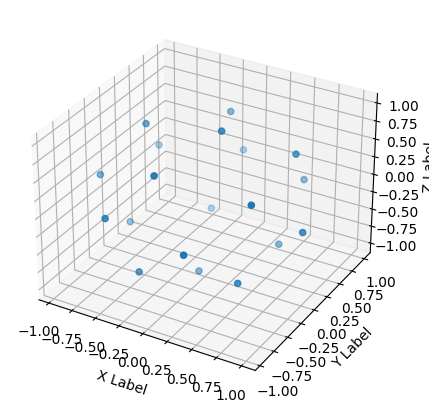

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import math

def d(a,b):
    return math.sqrt((a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2)

def Thom(X):
    N=len(X)
    N0=0
    for i in range(N):
        for j in range(i+1,N):
            N0=N0+1/d(X[i],X[j])
    return N0/2

def grad(a,b):
    grad=np.zeros((3,1))
    grad[0]= -(a[0]-b[0])/((a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2)**(3/2)
    grad[1]= -(a[1]-b[1])/((a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2)**(3/2)
    grad[2]= -(a[2]-b[2])/((a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2)**(3/2)
    return grad

def grad_T(X,i):
    N=len(X)
    gradt=np.zeros((3,1))
    for j in range(N):
        if(i!=j):
            grad0=grad(X[i],X[j])
            gradt[0]+=grad0[0]
            gradt[1]+=grad0[1]
            gradt[2]+=grad0[2]
    return gradt



from numpy.linalg import norm
beta = 0.8 
maxIter = 50 
tol = 1e-3
alpha0 = 1 

def backTr(alpha, X, i, direction):
    Fn = Thom(X)
    xn=X[i][0]
    yn=X[i][1]
    zn=X[i][2]
    xn_1 = xn + alpha*direction[0, 0]
    yn_1 = yn + alpha*direction[1, 0]
    zn_1 = zn + alpha*direction[2, 0]
    X[i][0]=xn_1
    X[i][1]=yn_1
    X[i][2]=zn_1
    Fn_1 = Thom(X)
    while Fn < Fn_1:
        alpha = beta*alpha
        xn_1 = xn + alpha*direction[0,0]
        yn_1 = yn + alpha*direction[1, 0]
        yn_1 = zn + alpha*direction[2, 0]
        X[i][0]=xn_1
        X[i][1]=yn_1
        X[i][2]=zn_1
        Fn_1 = Thom(X)
    return alpha


def projectBack(an, bn,cn):
    norm_free = math.sqrt(an**2+bn**2+cn**2)
    if ( norm_free > 1 ):
        an, bn, cn = an/norm_free, bn/norm_free, cn/norm_free
    return an, bn, cn


def PGD_Thom(X,i):
    x0=X[i][0]
    y0=X[i][1]
    z0=X[i][2]
    xn_vec = [x0]
    yn_vec = [y0]
    zn_vec = [z0]
    F_vec = [Thom(X)]
    n = 0
    d = - grad_T(X,i)
    alpha = backTr(alpha0,X,i,d)
    
    an, bn, cn =x0+ alpha*d[0,0], y0 + alpha*d[1,0], z0 + alpha*d[2,0]
    compare = [an, bn, cn]/norm([an, bn, cn]) - [x0,y0,z0]

    X[i][0],X[i][1],X[i][2] = projectBack(an, bn,cn)
    xn_vec.append(X[i][0])
    yn_vec.append(X[i][1])
    zn_vec.append(X[i][2])
    F_vec.append(Thom(X))
    n=n+1
    
    while( norm(compare) >= tol and n < maxIter ):
        d = - grad_T(X,i) 
        alpha = backTr(alpha0, X,i, d)
        an, bn, cn = X[i][0]+ alpha*d[0,0], X[i][1] + alpha*d[1,0],X[i][2] + alpha*d[2,0]
        compare = [an, bn, cn]/norm([an, bn, cn]) - [X[i][0],X[i][1],X[i][2]]
        [X[i][0],X[i][1],X[i][2]]= projectBack(an, bn, cn)
        # Add the new values
        xn_vec.append(X[i][0])
        yn_vec.append(X[i][1])
        zn_vec.append(X[i][2])
        F_vec.append(Thom(X))
        n=n+1
    return X, xn_vec, yn_vec, zn_vec, F_vec, n


n=[0 for i in range(30)]
def f(X,N):
    X /= np.sqrt(np.sum(X**2, axis=1)).reshape(-1, 1)
    print('N: ',N)
    print('initial X:')
    print(X)
    o=X
    tol=1e-3
    i=2
    while(1):
        for i in range(N):
            o=X.copy()
            X,xn_vec, yn_vec, zn_vec,F_vec, n = PGD_Thom(X,i)
        if(norm(np.subtract(o,X))<tol):
            break
    print("Optimal point: ", X)
    xn=[]
    yn=[]
    zn=[]
    for i in X:
        xn.append(i[0])
        yn.append(i[1])
        zn.append(i[2])
    fig=plt.figure(figsize = (5, 5) )
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.scatter(xn, yn, zn, marker='o')
    return X

for N in range(9,14,2):
    X = np.random.randn(N, 3)
    a=f(X,N)
    n[N]=Thom(a)
    print('Potential in the website:')
    print('9: 25.7599865')
    print('11: 40.5964505')
    print('13: 58.8532306')
    print('Potential i got:')
    print(N,': ',n[N]*2)
x=[]
for i in range(3):
    for N in range(15,20,2):
        X = np.random.randn(N, 3)
        a=f(X,N)
        n[N]=Thom(a)
        x.append(Thom(a)*2)
print('Potential in the website:')
print('15: 80.6702441')
print('17: 106.0504048')
print('19: 135.0894676')
print('Potential i got:')
print('15:',x[0],x[3],x[6])
print('17:',x[1],x[4],x[7])
print('19:',x[2],x[5],x[8])


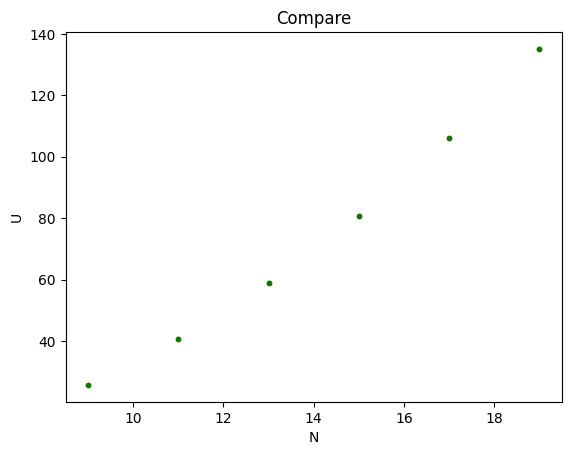

kind of need to zoom in here: for N=15,17


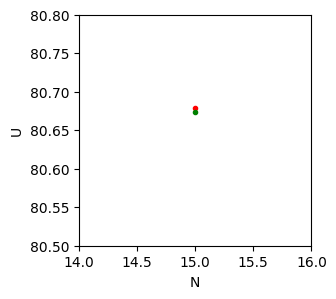

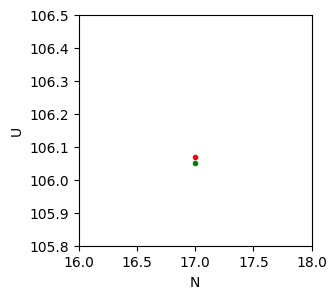

In [86]:
def Ua(N,a,b):
    return N**2/2*(1-a*N**(-1/2)+b*N**(-3/2))

a=1.10461
b=0.137
for i in range(9,20,2):        
    plt.plot(i, Ua(i,a,b), '.-', label='Uapprox',color ='r')
    plt.plot(i, n[i]*2, '.-', label='U',color ='g')
plt.title('Compare')
plt.ylabel('U')
plt.xlabel('N')
plt.show()
print('kind of need to zoom in here: for N=15,17')

plt.figure(figsize = (3, 3) )
plt.ylabel('U')
plt.xlabel('N')
plt.axis([14, 16, 80.5, 80.8])
plt.plot(15, Ua(15,a,b), '.-', label='Uapprox',color ='r')
plt.plot(15, n[15]*2, '.-', label='U',color ='g')
plt.show()

plt.figure(figsize = (3, 3) )
plt.axis([16, 18, 105.8, 106.5])
plt.plot(17, Ua(17,a,b), '.-', label='Uapprox',color ='r')
plt.plot(17, n[17]*2, '.-', label='U',color ='g')
plt.ylabel('U')
plt.xlabel('N')
plt.show()